In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("IRIS.csv")

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.shape

(150, 5)

In [8]:
X = data.drop("species", axis=1)
Y = data["species"].copy()


In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,Y, test_size=0.3)

In [12]:
train_x.shape

(105, 4)

In [13]:
train_y.shape

(105,)

In [14]:
test_x.shape

(45, 4)

In [15]:
test_y.shape

(45,)

In [16]:
train_y=pd.DataFrame(train_y, columns=["species"])

In [17]:
train_y.value_counts()

species        
Iris-virginica     39
Iris-versicolor    36
Iris-setosa        30
dtype: int64

1. iris-versicolor
2. Iris-virginica
3. Iris-setosa

In [18]:
train_y.replace(["Iris-versicolor", "Iris-virginica", "Iris-setosa"], [1,2,3], inplace=True)

In [19]:
train_y.value_counts()

species
2          39
1          36
3          30
dtype: int64

In [20]:
test_y.replace(["Iris-versicolor", "Iris-virginica", "Iris-setosa"], [1,2,3], inplace=True)

In [21]:
# group=["small", "medium", "large", "very large"]
# # train_x["sepal_length"] = pd.qcut(train_x["sepal_length"],4, labels = group)
# train_x["sepal_width"] = pd.qcut(train_x["sepal_width"],4, labels = group)
# train_x["petal_length"] = pd.qcut(train_x["petal_length"],4, labels = group)
# train_x["petal_width"] = pd.qcut(train_x["petal_width"],4, labels = group)

In [22]:
train_x.head()

,sepal_length,sepal_width,petal_length,petal_width
119,6.0,2.2,5.0,1.5
16,5.4,3.9,1.3,0.4
17,5.1,3.5,1.4,0.3
107,7.3,2.9,6.3,1.8
106,4.9,2.5,4.5,1.7


In [23]:
import seaborn as sns

<AxesSubplot:>

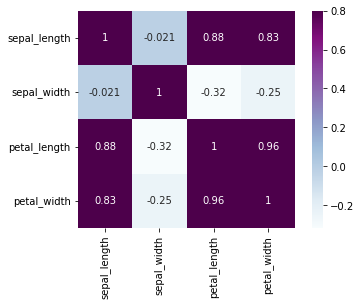

In [24]:
sns.heatmap(train_x.corr(), vmax=0.8, cmap="BuPu", square=True, annot=True)

C:\Program Files\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sepal Length/Width')

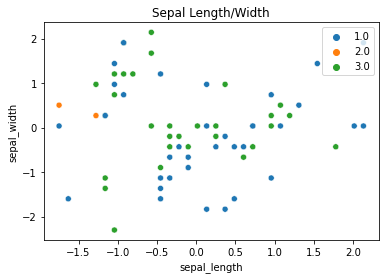

In [68]:
sns.scatterplot(train_x['sepal_length'],train_x['sepal_width'],hue=train_y['species'], palette='tab10')
plt.legend(loc='upper right')
plt.title('Sepal Length/Width')

C:\Program Files\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sepal Length/Width')

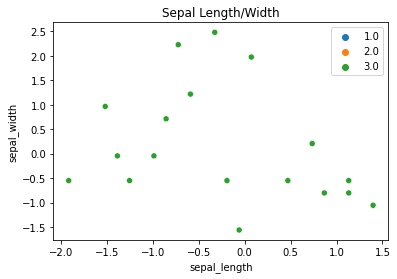

In [71]:
test_y = pd.DataFrame(test_y)
sns.scatterplot(test_x['sepal_length'],test_x['sepal_width'],hue=test_y['species'], palette='tab10')
plt.legend(loc='upper right')
plt.title('Sepal Length/Width')

In [73]:
test_y.value_counts()

species
3          20
1          14
2          11
dtype: int64

C:\Program Files\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

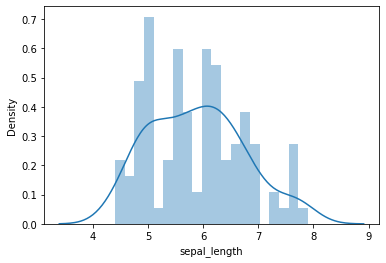

In [25]:
sns.distplot(train_x["sepal_length"], bins=20)

C:\Program Files\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

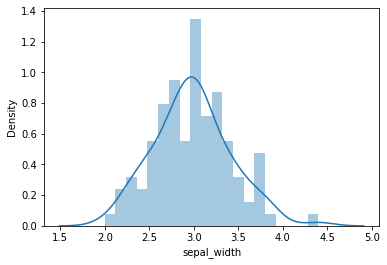

In [26]:
sns.distplot(train_x["sepal_width"], bins=20)

C:\Program Files\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_length', ylabel='Density'>

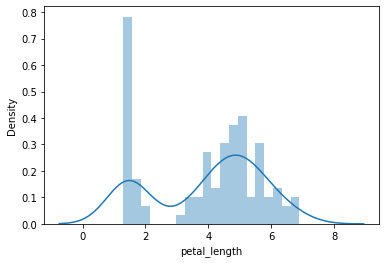

In [27]:
sns.distplot(train_x["petal_length"], bins=20)

C:\Program Files\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='petal_width', ylabel='Density'>

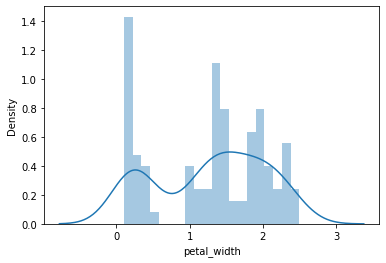

In [28]:
sns.distplot(train_x["petal_width"], bins=20)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(train_x)
train_x = sc.fit_transform(train_x)
train_x = pd.DataFrame(train_x, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
train_x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.134448,-1.830943,0.616478,0.301454
1,-0.571406,2.140178,-1.535378,-1.186493
2,-0.924333,1.205797,-1.477220,-1.321761
3,1.663799,-0.195775,1.372535,0.707258
4,-1.159617,-1.130156,0.325686,0.571990


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(train_x, train_y)


C:\Users\DEV\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [31]:
model.score(train_x,train_y)

0.9619047619047619

In [32]:
pred_train = model.predict(train_x)
accuracy_score( pred_train,train_y)

0.9619047619047619

## Model Testing

In [33]:
sc.fit(test_x,test_y)
test_x = sc.fit_transform(test_x)
test_x = pd.DataFrame(test_x, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
test_x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.735549,0.207793,0.768308,0.751196
1,-1.515230,-0.297649,-1.033587,-1.048246
2,0.735549,0.207793,1.500329,1.907980
3,-0.853236,0.713236,-1.089897,-1.048246
4,-0.985635,0.460514,-1.033587,-1.048246


In [34]:
test_y.head()

56     1
3      3
100    2
0      3
7      3
Name: species, dtype: int64

In [36]:
pred_test=model.predict(test_x)

In [37]:
accuracy_score(test_y, pred_test)

0.8222222222222222

## cross validation

In [52]:
from sklearn.model_selection import StratifiedKFold
i=1
accuracy_sr = []
skf = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,Y):
    print('{} in {} KFold\n'.format(i, skf.n_splits))
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = Y.iloc[train_index], Y.iloc[test_index]
    model= LogisticRegression(max_iter=1000)
    model.fit(xtr,ytr)
    pred_test = model.predict(xval)
    score= accuracy_score(yval,pred_test)
    print("accuracy score", score)
    accuracy_sr.append(score)
    i+=1
print("mean accuracy score: ", np.mean(accuracy_sr))
    

1 in 5 KFold

accuracy score 0.9666666666666667
2 in 5 KFold

accuracy score 1.0
3 in 5 KFold

accuracy score 0.9333333333333333
4 in 5 KFold

accuracy score 1.0
5 in 5 KFold

accuracy score 0.9
mean accuracy score:  0.9600000000000002


In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
i=1
accuracy_sr = []
skf = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,Y):
    print('{} in {} KFold\n'.format(i, skf.n_splits))
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = Y.iloc[train_index], Y.iloc[test_index]
    model= RandomForestClassifier()
    model.fit(xtr,ytr)
    pred_test = model.predict(xval)
    score= accuracy_score(yval,pred_test)
    print("accuracy score", score)
    accuracy_sr.append(score)
    i+=1
print("mean accuracy score: ", np.mean(accuracy_sr))
    

1 in 5 KFold

accuracy score 0.9333333333333333
2 in 5 KFold

accuracy score 1.0
3 in 5 KFold

accuracy score 0.9333333333333333
4 in 5 KFold

accuracy score 0.9666666666666667
5 in 5 KFold

accuracy score 0.9
mean accuracy score:  0.9466666666666667


In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
i=1
accuracy_sr = []
skf = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,Y):
    print('{} in {} KFold\n'.format(i, skf.n_splits))
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = Y.iloc[train_index], Y.iloc[test_index]
    model= SVC()
    model.fit(xtr,ytr)
    pred_test = model.predict(xval)
    score= accuracy_score(yval,pred_test)
    print("accuracy score", score)
    accuracy_sr.append(score)
    i+=1
print("mean accuracy score: ", np.mean(accuracy_sr))
    

1 in 5 KFold

accuracy score 0.9333333333333333
2 in 5 KFold

accuracy score 1.0
3 in 5 KFold

accuracy score 0.9333333333333333
4 in 5 KFold

accuracy score 1.0
5 in 5 KFold

accuracy score 0.9333333333333333
mean accuracy score:  0.96


In [51]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
i=1
accuracy_sr = []
skf = StratifiedKFold(n_splits = 5, random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,Y):
    print('{} in {} KFold\n'.format(i, skf.n_splits))
    xtr, xval = X.iloc[train_index], X.iloc[test_index]
    ytr, yval = Y.iloc[train_index], Y.iloc[test_index]
    model= DecisionTreeClassifier()
    model.fit(xtr,ytr)
    pred_test = model.predict(xval)
    score= accuracy_score(yval,pred_test)
    print("accuracy score", score)
    accuracy_sr.append(score)
    i+=1
print("mean accuracy score: ", np.mean(accuracy_sr))
    

1 in 5 KFold

accuracy score 0.9666666666666667
2 in 5 KFold

accuracy score 1.0
3 in 5 KFold

accuracy score 0.9333333333333333
4 in 5 KFold

accuracy score 1.0
5 in 5 KFold

accuracy score 0.8666666666666667
mean accuracy score:  0.9533333333333335


In [53]:
from joblib import dump, load
dump(model, 'iris.joblib')

['iris.joblib']